## Initialization: Daily Data
I have pulled down USD, CHF, EUR, and GBP historical data from SIX.

In [38]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', font_scale=1.5, rc = {'figure.figsize':(12,6)})

import warnings
warnings.filterwarnings('ignore')
# a value has been set on a copy of a slice of a dataframe....

# Data directory
data_dir = Path() / 'data'
# Data source:
# https://www.six-group.com/en/products-services/the-swiss-stock-exchange/market-data/etp/etp-explorer/etp-detail.CH0454664001USD4.html#/

# Create dict of dataframes from data_dir
df_dict = {}
for file in data_dir.glob('*.csv'):
    # Semicolon delimited, and skip two lines for simplicity
    df_dict[file.stem] = pd.read_csv(file, sep=';', skiprows=2)

In [39]:
GBP = df_dict.get('historical_GBP')
EUR = df_dict.get('historical_EUR')
USD = df_dict.get('historical_USD')
CHF = df_dict.get('historical_CHF')
markets = [GBP, EUR, USD, CHF]
markets_names = ['GBP', 'EUR', 'USD', 'CHF']
# concat dataframes and add name of symbol
master = pd.concat([GBP, EUR, USD, CHF], axis=1, keys=['GBP', 'EUR', 'USD', 'CHF'])

In [79]:
master.head(20)

GBP                         EUR                         USD  \
           Date   Price Volume         Date   Price Volume         Date   
0    24.03.2022  11.472      4   24.03.2022  13.734    301   24.03.2022   
1    23.03.2022  11.196      6   23.03.2022  13.620      0   23.03.2022   
2    22.03.2022  11.450      9   22.03.2022  13.530    500   22.03.2022   
3    21.03.2022  11.052      2   21.03.2022  13.180   1890   21.03.2022   
4    18.03.2022  11.024      0   18.03.2022  13.132      0   18.03.2022   
5    17.03.2022  10.984      4   17.03.2022  12.938      0   17.03.2022   
6    16.03.2022  10.954   4119   16.03.2022  13.018   7936   16.03.2022   
7    15.03.2022  10.392      2   15.03.2022  12.372      7   15.03.2022   
8    14.03.2022  10.496      0   14.03.2022  12.626   4601   14.03.2022   
9    11.03.2022  10.422      0   11.03.2022  12.546    139   11.03.2022   
10   10.03.2022  10.434   1072   10.03.2022  12.506    648   10.03.2022   
11   09.03.2022  11.336      0   09.03.2022  13.572    262   09.03.2022   
12   08.03.2022  10.318      0   08.03.2022  12.528    538   08.03.2022   
13   07.03.2022  10.566      0   07.03.2022  12.420    320   07.03.2022   
14   04.03.2022  10.846      0   04.03.2022  13.230  11890   04.03.2022   
15   03.03.2022  11.206   3079   03.03.2022  13.606   1322   03.03.2022   
16   02.03.2022  11.792    826   02.03.2022  14.060   1403   02.03.2022   
17   01.03.2022  11.564   5959   01.03.2022  13.896   3047   01.03.2022   
18   28.02.2022  10.172    816   28.02.2022  12.924   1523   28.02.2022   
19   25.02.2022  10.106   4899   25.02.2022  12.194    425   25.02.2022   

                            CHF                 
     Price  Volume         Date   Price Volume  
0   15.422   30184   24.03.2022  14.350   2664  
1   15.080   73138   23.03.2022  13.942   1375  
2   14.990   49741   22.03.2022  14.000   3812  
3   14.500   68929   21.03.2022  13.502   1146  
4   14.526   29049   18.03.2022  13.370   2530  
5   14.350   55561   17.03.2022  13.488   4080  
6   14.208   88114   16.03.2022  13.434   5787  
7   13.704   36793   15.03.2022  12.820    475  
8   13.700    8221   14.03.2022  12.860   3844  
9   13.856   55383   11.03.2022  12.840   1440  
10  13.778   26094   10.03.2022  12.790  15945  
11  15.000  371713   09.03.2022  13.798   5391  
12  13.508   20505   08.03.2022  12.702   5895  
13  13.900   29553   07.03.2022  12.842   8926  
14  14.320   44534   04.03.2022  13.188   3561  
15  15.010   62495   03.03.2022  13.716   5778  
16  15.646   28034   02.03.2022  14.536  12567  
17  15.334   95879   01.03.2022  14.166  12489  
18  14.496  105703   28.02.2022  13.200   2097  
19  13.924   71307   25.02.2022  12.856  12280

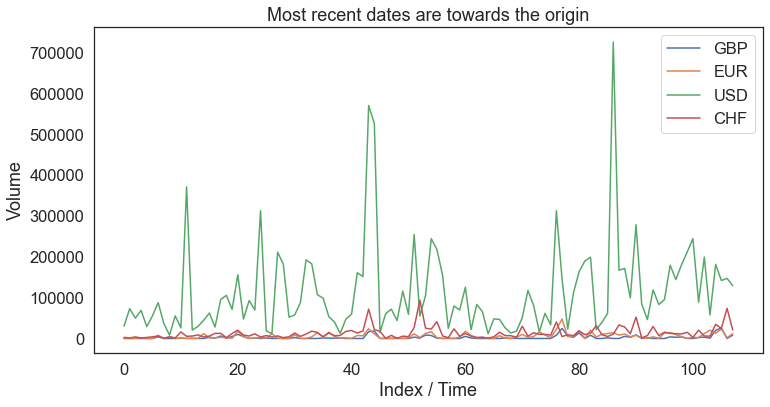

In [42]:
for i, v in enumerate(markets):
    # Plot volume of each pair

    plot = sns.lineplot(x=v.index, y=v['Volume'], label = markets_names[i])
    plot.set_xlabel('Index / Time')
    plot.set_ylabel('Volume')
    plot.set_title('Most recent dates are towards the origin')
    # plot.invert_xaxis()

# from functions import sns_lineplot
# sns_lineplot(markets, markets_names)


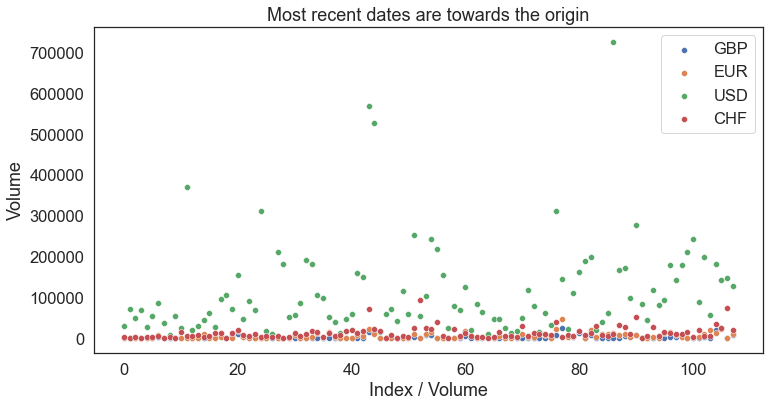

In [43]:
for i, v in enumerate(markets):
    # Plot volume of each pair with seaborn
    plot = sns.scatterplot(x=v.index, y=(v['Volume']), label = markets_names[i])
    plot.set_xlabel('Index / Volume')
    plot.set_ylabel('Volume')
    plot.set_title('Most recent dates are towards the origin')


#### Manipulation
Let's manipulate the original data so that the log plot of volume correctly shows zero days where they actually are.  
  
**Math nerd question: What problems are we going to encounter very shortly?**

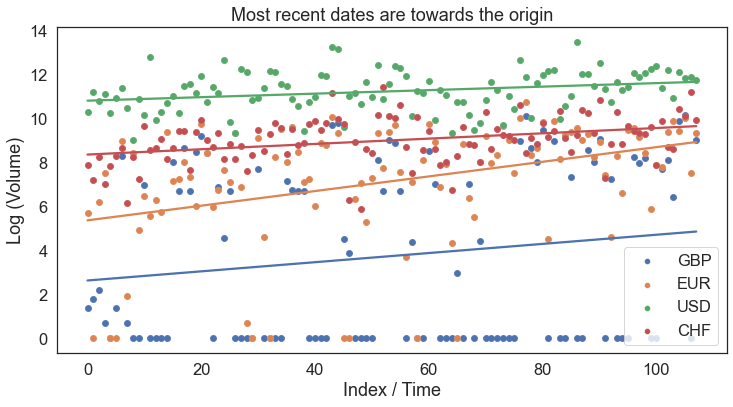

In [44]:
for df in markets:
    # replace 0 with 1
    df['Volume'] = df['Volume'].replace(0, 1)

for i, v in enumerate(markets):
    # Plot volume of each pair with seaborn
    plot = sns.scatterplot(x=v.index, y=np.log(v['Volume']), label = markets_names[i])
    # Add regression line for each pair
    # We can skip confidence interval
    plot = sns.regplot(x=v.index, y=np.log(v['Volume']), ci=False)
    plot.set_xlabel('Index / Time')
    plot.set_ylabel('Log (Volume)')
    plot.set_title('Most recent dates are towards the origin')

#### Takeaways
USD has the most volume, followed by CHF.  
This is in line with my expectation.  
The Euro has move volume than the Pound, but they both have some days with zero volume.  
I suspect this is reporting error.

Is there any correlation between the currencies?

In [45]:
# Are the volumes correlated?
# plot correlation matrix
volume_only = pd.DataFrame()
for i, v in enumerate(markets):
    volume_only[markets_names[i]] = v['Volume']

<AxesSubplot:>

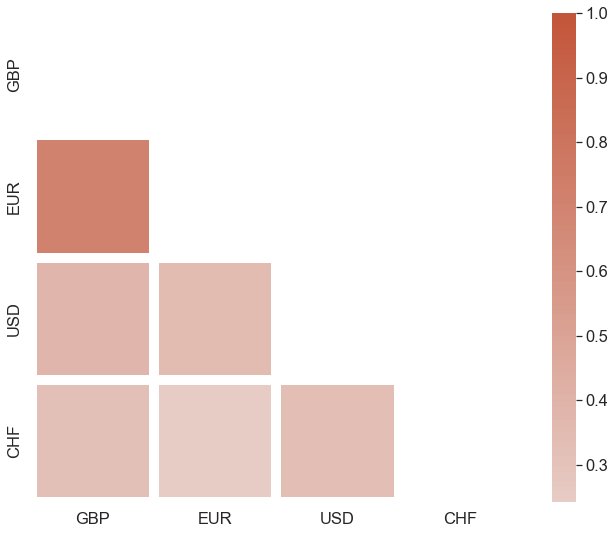

In [46]:
# plot correlation matrix
corr = volume_only.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=10)

In [47]:
# Check correlation values
corr

,GBP,EUR,USD,CHF
GBP,1.000000,0.705659,0.381376,0.314623
EUR,0.705659,1.000000,0.347159,0.242031
USD,0.381376,0.347159,1.000000,0.336213
CHF,0.314623,0.242031,0.336213,1.000000


The correlation between GBP and EUR volume is ~0.7; suspect that this is largely caused be the zero values.

 ##### Alternatives?
 What about turnover (volume * price) instead of only looking at share volume?
 
 Recall, though, that we are essentially comparing the same underlying across multiple markets, so one share is one share is one share.

 We could look at exchange rates at a minimum to see where there is more investigation warranted.

 I am confident that there are periodic arbitrage opportunities here, but that is well outside of the scope of this presentation.


## Initialization: Intra-Day Data

In [48]:
# Data directory
data_dir = Path() / 'intraday_data'

# Create dict of dataframes from data_dir

for file in data_dir.glob('*.csv'):
    # Semicolon delimited, and skip two lines for simplicity
    # There is only one file in this folder.
    # https://www.six-group.com/en/products-services/the-swiss-stock-exchange/market-data/etp/etp-explorer/etp-detail.CH0454664001USD4.html#/
    df = pd.read_csv(file, sep=';', skiprows=2)

#### Trading hours
SIX trading hours are from 0900 to 1720 GMT +1, so let's take a look at the intra-day trades on the 24th of March.

In [50]:
df
# I'll assume this 17:27 is after hours trading
# It does seem correct that we have two trades immediately preceding the close at 17:19:58.73

,Time,Price,Volume
0,17:27:53.51,15.498,120
1,17:19:58.73,15.550,145
2,17:19:58.73,15.538,500
3,16:53:58.42,15.474,200
4,16:37:03.84,15.470,1300
5,16:37:03.84,15.460,500
6,16:34:41.71,15.432,2000
7,16:34:41.71,15.446,500
8,16:17:38.35,15.422,1702
9,15:56:34.29,15.312,342


## Hypothesis  
 If we look at Binance Spot price movement, we can likely see the price of ABTC following BTCUSDT in short order.  
 
 **Question: How quickly do prices follow?**

 First, though, let's estimate it whether these reported volumes are buys or sells.  
 Simple logic:
 
         DF['Pressure'] = BUY if next_price > current_price else SELL

*Note for later: we will need to shift these times to match GMT + 1*

In [51]:
# note I am reversing the dataframe here because pct_change() is a forward looking function
df = df[::-1]
df['Delta'] = df['Price'].pct_change()
df.head()


,Time,Price,Volume,Delta
33,09:00:56.00,15.194,200,NaN
32,09:11:47.95,15.172,500,-0.001448
31,09:11:47.95,15.184,4009,0.000791
30,09:11:47.97,15.190,5103,0.000395
29,09:11:47.97,15.190,388,0.000000


In [52]:
# Add column 'Pressure' if 'Delta' is positive
# df['Pressure'] = 'BUY' if df['Delta'] > 0 else 'SELL'     # truth error
df['Pressure'] = np.where(df['Delta'] > 0, 'BUY', 'SELL')
df['Pressure'] = np.where(df['Delta'] == 0, '0', df['Pressure'])
# Shift pressure backwards once so it corresponds to the correct volume row
df['Pressure'] = df['Pressure'].shift(-1)
print('Let us look at the first few rows and see what happens at market open:')
df.head(10)

Let us look at the first few rows and see what happens at market open:


,Time,Price,Volume,Delta,Pressure
33,09:00:56.00,15.194,200,NaN,SELL
32,09:11:47.95,15.172,500,-0.001448,BUY
31,09:11:47.95,15.184,4009,0.000791,BUY
30,09:11:47.97,15.190,5103,0.000395,0
29,09:11:47.97,15.190,388,0.000000,SELL
28,09:21:02.36,15.150,500,-0.002633,BUY
27,09:23:40.69,15.156,500,0.000396,BUY
26,09:23:40.69,15.170,200,0.000924,BUY
25,10:16:58.34,15.176,500,0.000396,BUY
24,10:16:58.34,15.194,200,0.001186,SELL


**Some thoughts:**  
It looks like market maker or at minimum algo trading activity at 09:11:47.  
This is probably the largest conjecture that I will make throughout the presentation.

In [53]:
# List columns of df - something funny with trying to count the Time column
print(df.columns)
df.rename(columns={'        Time': 'Time'}, inplace=True)
print(df.columns)
df['Time'].value_counts().head(10)

Index(['        Time', 'Price', 'Volume', 'Delta', 'Pressure'], dtype='object')
Index(['Time', 'Price', 'Volume', 'Delta', 'Pressure'], dtype='object')


12:47:52.95    3
09:11:47.97    2
17:19:58.73    2
09:23:40.69    2
10:16:58.34    2
16:37:03.84    2
16:34:41.71    2
09:11:47.95    2
09:00:56.00    1
14:53:08.05    1
Name: Time, dtype: int64

In [54]:
# print lines where 'Time' == 12:47:52.95
print(df.where(df['Time'] == '12:47:52.95').dropna())

           Time   Price  Volume     Delta Pressure
19  12:47:52.95  15.128  4009.0 -0.000132     SELL
18  12:47:52.95  15.102   593.0 -0.001719     SELL
17  12:47:52.95  15.004  1701.0 -0.006489     SELL


Wow!  
There is a perfect example of slippage on this order.  
So... How much is it?


In [55]:
turnover = 15.128 * 4009 + 15.102 * 593 + 15.004 * 1701
print("Dollar volume is ${0:.2f}".format(turnover))

Dollar volume is $95125.44


A $95k transaction has moved the market by itself.  
But by how much?  
Not all of it was slippage, only about 1/3rd of the order was filled sub-par.

In [56]:
avg_price = (15.128 * 4009 + 15.102 * 593 + 15.004 * 1701) / (4009 + 593 + 1701)
print("Average Price is ${0:.3f} compared to an initial fill at $15.128".format(avg_price))
# slippage_per_share = (15.128 - avg_price) / (4009 + 593 + 1701)
# slippage_per_share

Average Price is $15.092 compared to an initial fill at $15.128


In [57]:
# total slippage =  expected * volume -  actual * volume
total = 15.128 * (4009 + 593 + 1701) - avg_price * (4009 + 593 + 1701)
print("Total USD slippage is: ${0:.2f} out of ${1:.2f}".format(total, turnover))
print("In percentage terms, this is {0:.5f}%".format(total / turnover * 100))
# Vectorize the following for speed
daily_dollars = sum (df['Price'].to_numpy() * df['Volume'].to_numpy() )
print('')
print("The daily turnover is ${0:.2f}".format(daily_dollars))

Total USD slippage is: $226.34 out of $95125.44
In percentage terms, this is 0.23794%

The daily turnover is $539538.72


### Conclusion
Immediately the 0.237% figure caught my eye.  
I am curious what the standard slippage amount is for a $100k order.  
I suspect for the other currency pairs (EUR, GBP) this number would be higher.    
To better analyze the data, I needed to know the daily turnover.  

*This transaction was almost 1/5th of the daily volume for the instrument.*  

*0.237% for nearly 1/5th of the daily volume, however, seems quite reasonable.*

**Let's move on.**

It's time to compare the ABTC price to the price of the underlying.

## Get Binance minute data for 24 March 2022
I am using 5m candles here;  this will let us do some decent visual analysis inside the notebook without much hassle.

In [59]:
# get binance minute data for 24 March 2022url = 'https://api.binance.com/api/v3/klines'
import requests
import json
import datetime as dt
url = 'https://api.binance.com/api/v3/klines'
symbol = 'BTCUSDT'
interval = '5m'
start = str(int(dt.datetime(2022,3,24).timestamp()*1000))
end = str(int(dt.datetime(2022,3,25).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end}
data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
#format columns name
data.columns = ['datetime', 'Open', 'High', 'Low', 'Close', 'Volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
# set index to datetime column
data.index = data['datetime']
# drop a few columns
data = data.drop(['datetime', 'close_time', 'qav', 'num_trades','taker_quote_vol', 'ignore'], axis=1)
data.head()

,Open,High,Low,Close,Volume,taker_base_vol
datetime,,,,,,
1.648094e+12,42712.87,42766.44,42712.87,42756.23,92.42798,43.76746
1.648095e+12,42756.22,42782.00,42741.36,42782.00,72.39337,26.69806
1.648095e+12,42781.99,42787.60,42755.68,42787.59,73.95845,24.14962
1.648095e+12,42787.60,42795.91,42746.71,42795.90,76.79435,33.99579
1.648096e+12,42795.90,42869.69,42788.49,42841.73,116.10707,55.99797


Something strange about the above - how does taker_base_vol not equal 1/2 * Volume?  
I wonder if Binance has so much volume that it sometimes pairs makers with makers?  
Again, beyond the scope of this presentation.  Does anyone know?

Don't forget - we are not in the same time zone.

In [60]:
# Convert index to hh:mm:ss.ms
# Shift one hour to get GMT +1
data.index = pd.to_datetime(data.index, unit='ms').shift(1, freq='H')
# drop outside of time frame 0900 - 1730
data = data.loc[(data.index.hour >= 9) & (data.index.hour <= 17)]
data

,Open,High,Low,Close,Volume,taker_base_vol
datetime,,,,,,
2022-03-24 09:00:00,43077.75,43112.01,43001.00,43012.46,102.92280,42.83836
2022-03-24 09:05:00,43012.46,43058.52,42984.94,43044.13,253.48538,160.32600
2022-03-24 09:10:00,43044.14,43150.01,43010.11,43062.50,621.25349,237.49487
2022-03-24 09:15:00,43062.50,43079.48,42980.01,42983.24,148.80402,58.73886
2022-03-24 09:20:00,42983.25,43027.29,42975.56,43014.59,193.41688,120.13386
...,...,...,...,...,...,...
2022-03-24 17:35:00,43852.40,43945.86,43842.04,43891.93,218.95453,84.88079
2022-03-24 17:40:00,43891.93,43975.00,43872.50,43960.02,171.90991,63.21077
2022-03-24 17:45:00,43960.02,43962.48,43900.00,43903.04,132.61287,59.90926


Let's plot the Binance 5m data to get a visual of what happened on 24-March-2022.

In [61]:
from math import pi
from bokeh.plotting import figure, show, output_notebook
output_notebook()

inc = data.Close > data.Open
dec = data.Open > data.Close
w = 5*60*1000 # half day in ms
data['date'] = pd.to_datetime(data.index, unit='ms')
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, width=1000, title = "Binance BTCUSDT 5m")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(data.date, data.High, data.date, data.Low, color="black")
p.vbar(data.date[inc], w, data.Open[inc], data.Close[inc], fill_color="#207318", line_color="black")
p.vbar(data.date[dec], w, data.Open[dec], data.Close[dec], fill_color="#c40404", line_color="black")

show(p)


Loading BokehJS ...

Let's double check our old SIX data

In [63]:
df.head()

,Time,Price,Volume,Delta,Pressure
33,09:00:56.00,15.194,200,NaN,SELL
32,09:11:47.95,15.172,500,-0.001448,BUY
31,09:11:47.95,15.184,4009,0.000791,BUY
30,09:11:47.97,15.190,5103,0.000395,0
29,09:11:47.97,15.190,388,0.000000,SELL


In [64]:
# Remove miliseconds from Time column
df['date'] = df['Time'].str.split('.').str[0]

# Add 2022-03-24 to date column
df['date'] = '2022-03-24' + ' ' + df['date']
df['date'] = pd.to_datetime(df['date'])

#### Plot together
Let's take a look at the Binance Spot price and our ABTC price movements.

*Note: there is an issue since intraday data is sparse for ABTC.*


In [65]:
import plotly.graph_objects as go
margins = dict(l=20, r=20, b=20, t=40)

fig = go.Figure(data=[go.Candlestick(x=data['date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False, title_text="Binance BTCUSDT 5m", margin=margins, height=390)
fig.show()

fig2 = go.Figure(data=[go.Line(x=df['Time'], y=df['Price']), ])
fig2.update_layout(xaxis_rangeslider_visible=False, title_text="SIX ABTC price movement", margin=margins, height=390)
fig2.show()

In [66]:
df.sort_values(by='Volume', ascending=False).head()

,Time,Price,Volume,Delta,Pressure,date
30,09:11:47.97,15.190,5103,0.000395,0,2022-03-24 09:11:47
19,12:47:52.95,15.128,4009,-0.000132,SELL,2022-03-24 12:47:52
31,09:11:47.95,15.184,4009,0.000791,BUY,2022-03-24 09:11:47
11,15:47:17.32,15.350,3800,0.017365,BUY,2022-03-24 15:47:17
6,16:34:41.71,15.432,2000,-0.000906,BUY,2022-03-24 16:34:41


## Dialing in
Let's take a look at the chart for the previously mentioned interesting points in time:   
12:47:52.95	  
15:47:17.32	

#### Hypothesis:
We will see movements at Binance for BTCUSDT preceed the price movements at SIX of ABTC.

Let's check the first time frame and compare to actual price movement.

In [28]:
df[14:20]

,Time,Price,Volume,Delta,Pressure,date
19,12:47:52.95,15.128,4009,-0.000132,SELL,2022-03-24 12:47:52
18,12:47:52.95,15.102,593,-0.001719,SELL,2022-03-24 12:47:52
17,12:47:52.95,15.004,1701,-0.006489,SELL,2022-03-24 12:47:52
16,12:47:52.97,14.932,1806,-0.004799,BUY,2022-03-24 12:47:52
15,12:48:17.95,15.132,500,0.013394,SELL,2022-03-24 12:48:17
14,12:48:57.62,15.124,1306,-0.000529,SELL,2022-03-24 12:48:57


What was going on on Binance?  
*Recall that Binance is on GMT*

![Before Noon](tv_images/noise.png)

The above looks largely inconsequential.  Unsure what to conclude here.  We can discuss if desired.

Let's check the second time period.

In [68]:
df[20:25]

,Time,Price,Volume,Delta,Pressure,date
13,13:53:50.16,15.112,290,-0.000793,SELL,2022-03-24 13:53:50
12,14:53:08.05,15.088,250,-0.001588,BUY,2022-03-24 14:53:08
11,15:47:17.32,15.350,3800,0.017365,BUY,2022-03-24 15:47:17
10,15:47:17.33,15.400,15,0.003257,SELL,2022-03-24 15:47:17
9,15:56:34.29,15.312,342,-0.005714,BUY,2022-03-24 15:56:34


First let's look at the daily 1m bars.  Notice how this looks similar enough to our earlier 5m plot with bokeh:  

![Daily](tv_images/zoom_out.png)

Zooming in towards 15:47:17.33 where we had a huge price hike:

![Zoom In](tv_images/zoom_in.png)

#### Conclusion:
ABTC on SIX is liquid enough to follow the Binance spot price within one minute of a 0.77% price change.  
If we compared the different currency tickers, I suspect that we could find arbitrage opportunities here as well.



## What about live liquidity?
Let's find out how much liquidity is in the underlying and graph it.

In [69]:
# 100 orders past top of book
r = requests.get("https://api.binance.com/api/v3/depth", params=dict(symbol="BTCUSDT", limit=100))
results = r.json()
frames = {side: pd.DataFrame(data=results[side], columns=["price", "quantity"],
                             dtype=float) for side in ["bids", "asks"]}
frames_list = [frames[side].assign(side=side) for side in frames]
data = pd.concat(frames_list, axis="index", ignore_index=True, sort=True)
price_summary = data.groupby("side").price.describe()
price_summary
data

,price,quantity,side
0,46744.99,0.08300,bids
1,46742.50,0.00700,bids
2,46741.59,0.00951,bids
3,46740.31,0.26000,bids
4,46739.87,1.60451,bids
...,...,...,...
195,46773.61,0.68158,asks
196,46773.99,2.11609,asks
197,46774.00,0.00700,asks
198,46774.02,0.00811,asks


In [70]:
max = frames["bids"].price.max()
min = frames["asks"].price.min()
print('The current highest bid is ${0:.2f}'.format(max))
print('The current lowest ask is ${0:.2f}'.format(min))

The current highest bid is $46744.99
The current lowest ask is $46745.00


We've looked at a bit too much data.  Let's start wrapping up.  
How much depth is there to the current liquidity?

In [71]:
r = requests.get("https://api.binance.com/api/v3/ticker/bookTicker", params=dict(symbol="BTCUSDT"))
book_top = r.json()
name = book_top.pop("symbol")  # get symbol and also delete at the same time
s = pd.Series(book_top, name=name, dtype=float)
s


bidPrice    46749.49000
bidQty          4.82471
askPrice    46749.50000
askQty          0.11865
Name: BTCUSDT, dtype: float64

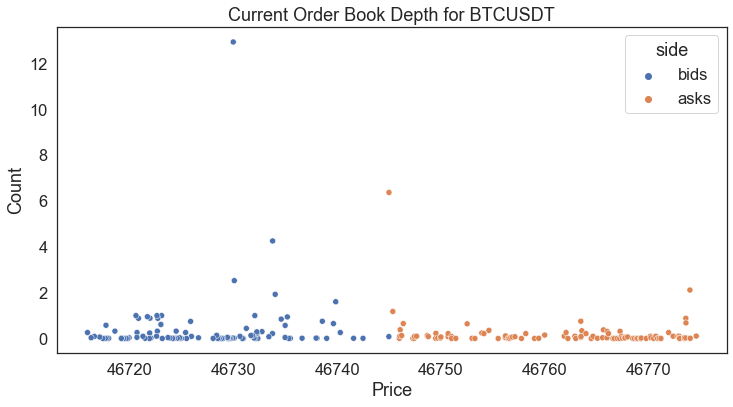

In [73]:
# Order book scatter plot
fig, ax = plt.subplots()

ax.set_title(f"Current Order Book Depth for {name}")

sns.scatterplot(x="price", y="quantity", hue="side", data=data, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("Count")

plt.show()

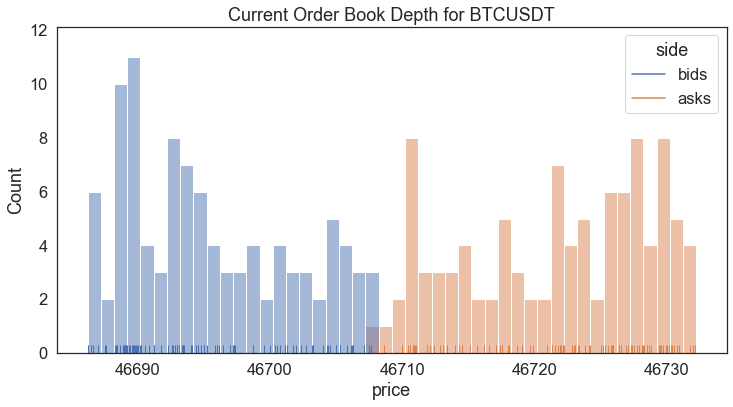

In [34]:
# Order book histogram
fig, ax = plt.subplots()

ax.set_title(f"Current Order Book Depth for {name}")

sns.histplot(x="price", hue="side", binwidth=1, data=data, ax=ax)
sns.rugplot(x="price", hue="side", data=data, ax=ax)

plt.show()

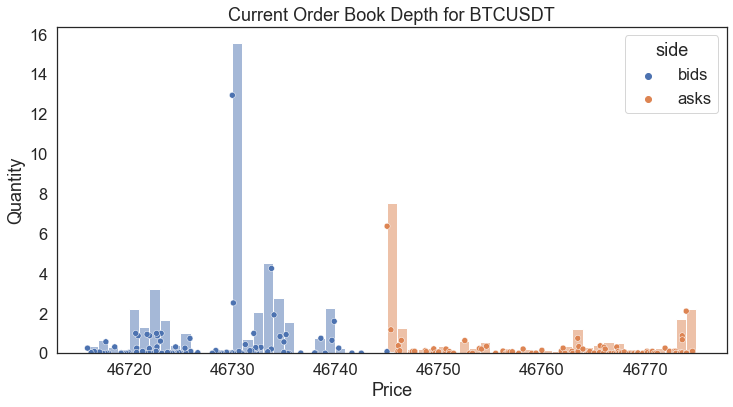

In [74]:
# Order book weighted histogram - now we are getting somewhere
fig, ax = plt.subplots()

ax.set_title(f"Current Order Book Depth for {name}")

sns.histplot(x="price", weights="quantity", hue="side", binwidth=1, data=data, ax=ax)
sns.scatterplot(x="price", y="quantity", hue="side", data=data, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

plt.show()

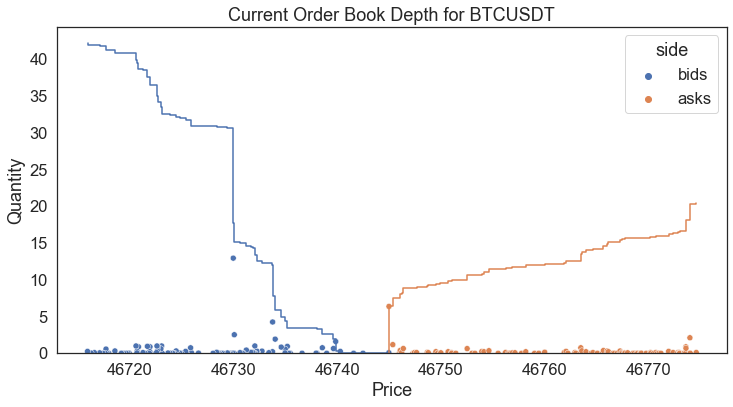

In [75]:
# Order book depth chart

fig, ax = plt.subplots()

ax.set_title(f"Current Order Book Depth for {name}")
sns.ecdfplot(x="price", weights="quantity", stat="count", complementary=True, data=frames["bids"], ax=ax)
sns.ecdfplot(x="price", weights="quantity", stat="count", data=frames["asks"], ax=ax)
sns.scatterplot(x="price", y="quantity", hue="side", data=data, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

plt.show()

Finale: how much liquidity is there at this very moment with NO SLIPPAGE?

In [81]:
import time
from IPython.display import clear_output
counter = 0

while counter <= 20:
    now = time.time()
    r = requests.get("https://api.binance.com/api/v3/ticker/bookTicker", params=dict(symbol="BTCUSDT"))
    book_top = r.json()
    name = book_top.pop("symbol")  # get symbol and also delete at the same time
    s = pd.Series(book_top, name=name, dtype=float)
    buyer_liquidity = s.get("askPrice") * s.get("askQty")
    seller_liquidity = s.get("bidPrice") * s.get("bidQty")
    delay = time.time() - now
    print('Request and response delay: {0:.2f} seconds'.format(delay))
    print(f"Buyer liquidity: ${round(buyer_liquidity, 2)}, BTC quantity: {(s.get('askQty'))}")
    print(f"Seller liquidity: ${round(seller_liquidity, 2)}, BTC quantity: {(s.get('bidQty'))}")
    time.sleep(1)
    counter += 1
    clear_output(wait=True)

Request and response delay: 1.05 seconds
Buyer liquidity: $86808.73, BTC quantity: 1.81421
Seller liquidity: $171311.57, BTC quantity: 3.58023


## Final Thoughts
It would be relatively easy to build a tool that finds current liquidity within a allowable slippage percent for the underlying, but BTC on Binance still has some issues, the main one being:  
* **Order book spoofing is rampant.**  

This could be mitigated by some combination of order types, such as Limit + Fill or Kill.  
To the best of my knowledge, frontrunning a la Hedge Funds ("Flash Boys" - Michael Douglas) does not happen by other market participants.  This is beneficial for liquidity takers. 

There is some lag time between when the price moves on Binance and the price moves on SIX.  
  
I am quite impressed that 1/5th of the daily volume on ABTC only incurred 0.25% slippage!  

____

Final questions I have for you:  
How often do you need to rebalance the ETP?  
How often do you issue new shares?

Thus concludes my presentation on crypto ETP and underlying liquidity.

notes:
Volume is a good measure of liquidity in the past and is indicative of the future.
We like liquidity because it implies health of an asset.  Liquidity allows us to buy or sell large quantities at very close to market price in a very short time.  There are two decent proxies to measure liquidity: the bid ask spread and the order book depth.